In [38]:
from keras.models import load_model
import pickle
import cv2
import numpy as np
import cvlib as cv
from PIL import Image

import matplotlib.pyplot as plt
from cvlib.object_detection import draw_bbox
%matplotlib inline

In [3]:
loaded_model=load_model('FruitClassifier.h5')

In [4]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 48)        3648      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 92, 92, 112)       134512    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 88, 88, 112)       313712    
_________________________________________________________________
flatten (Flatten)            (None, 867328)            0         
_________________________________________________________________
dense (Dense)                (None, 48)                41631792  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 49        
Total params: 42,083,713
Trainable params: 42,083,713
Non-trainable params: 0
____________________________________________

In [36]:
def predict_class(img):
    img=cv2.resize(img, (100,100))
    img=img/255
    Img=img.reshape(1,100,100,3)
    for i in loaded_model.predict(Img):
        for j in i:
            if i >= 0.5:
                return 'Rotten'
            else:
                return 'Fresh'

In [15]:
def classify_fruit(img):  # input as openCV image
    # converting openCV to PIL for cropping
    Img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    PIL_img = Image.fromarray(Img)
    
    coor, label, conf = cv.detect_common_objects(img)    # detectimg fruit
    for i in coor:
        for j in label:
            if j == 'orange' or j == 'apple' or j == 'banana':      # checking for our 3 classes apple, banana, oranges
                x,y,w,h = i
                roi = PIL_img.crop((i))                            # cropping Image to find roi (region of interest)
                roi = np.asarray(roi)
                if predict_class(roi) == 'Rotten':
                    cv2.rectangle(img, (x,y), (w,h), (0,0,255), 2)
                    cv2.putText(img, 'Rotten', (x+5, y+18), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,255), 2)
                elif predict_class(roi) == 'Fresh':
                    cv2.rectangle(img, (x,y), (w,h), (0,255,0), 2)
                    cv2.putText(img, 'Fresh', (x+5, y+18), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0), 2)
                    
    return img

### Reading Video

In [40]:
cap = cv2.VideoCapture('apple_insta.mp4')
cap.set(cv2.CAP_PROP_FPS,15)
fps = int(cap.get(5))
print(f'fps : {fps}')


width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

writer= cv2.VideoWriter('real_insta.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 30, (width, height))

if cap.isOpened() == False:
    print('Error in opening video!!')
else:
    while cap.isOpened()==True:
        ret, image = cap.read()
        if ret==True:
            cv2.imshow('Window', classify_fruit(image))
            writer.write(classify_fruit(image))
            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        else:
            break
cap.release()
writer.release()
cv2.destroyAllWindows()

fps : 30


### Reading Image

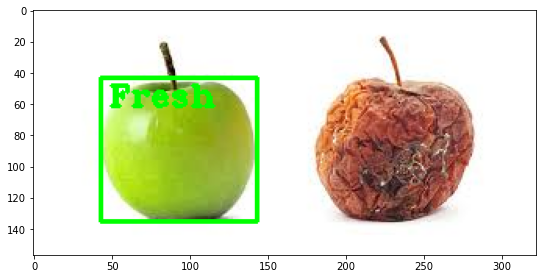

In [61]:
img = cv2.imread('download_1.jpg')
plt.figure(figsize=(9,9))
image=cv2.cvtColor(classify_fruit(img), cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [50]:
cv2.imwrite('MyImg.jpg',cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

True

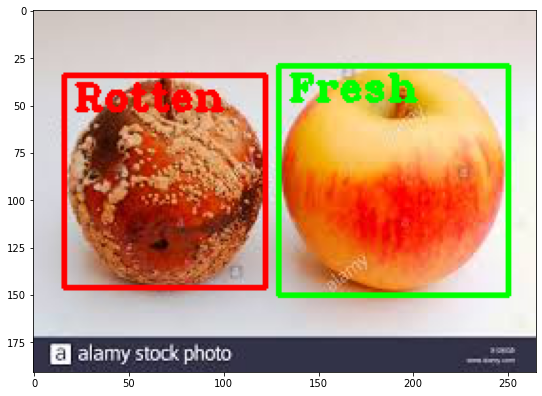

In [32]:
img= Image.open('download.jpg')
image=np.asarray(img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
coor, label, confidence = cv.detect_common_objects(image)
for i in coor:
    for j in label:
        if j == 'orange' or j == 'apple' or j == 'banana':
            x,y,w,h = i
            roi = img.crop((i))
            roi = np.asarray(roi)
            if predict_class(roi) == 'Rotten':
                cv2.rectangle(image, (x,y), (w,h), (0,0,255), 2)
                cv2.putText(image, 'Rotten', (x+5, y+18), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,255), 2)
            elif predict_class(roi) == 'Fresh':
                cv2.rectangle(image, (x,y), (w,h), (0,255,0), 2)
                cv2.putText(image, 'Fresh', (x+5, y+18), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0), 2)            
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(9,9))
plt.imshow(image)

### Reading Webcam

In [43]:
cap = cv2.VideoCapture(0)
cap.set(3, 640)        # 3 is Id for width
cap.set(4, 640)        # 4 is Id for height
cap.set(10, 1000)

cap.set(cv2.CAP_PROP_FPS,15)
fps = int(cap.get(5))
print(f'fps : {fps}')

height = 640
width = 640

writer = cv2.VideoWriter('WebCam.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 25, (width, height))

if cap.isOpened() == False:
    print('Error in opening web cam')
else:
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            cv2.imshow('WebCam', classify_fruit(frame))
            writer.write(classify_fruit(frame))
            if cv2. waitKey(25) & 0xFF == ord('q'):
                break
        else:
            break
cap.release()
writer.release()
cv2.destroyAllWindows()

fps : 1


In [53]:
cap=cv2.VideoCapture(0)
cap.set(3, 640)        # 3 is Id for width
cap.set(4, 480)        # 4 is Id for height
cap.set(10, 1000)

writer = cv2.VideoWriter('WebCam.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 25, (width, height))

if (cap.isOpened() == False):
    print("Error in opening webcam")
while(cap.isOpened()):
    ret,img=cap.read()
    if ret==True:
#         cv2.rectangle(img, (200,200), (350,350), (255,0,255),3)
        cv2.imshow('Video', classify_fruit(img))
        writer.write(classify_fruit(img))
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
writer.release()
cv2.destroyAllWindows()